In [ ]:
#Task1

In [1]:
!pip install ts2vg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.0 MB/s 


In [2]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 7.4 MB/s 


In [3]:
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 7.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.9 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=b03f7bf6427f8e3bc0c0e2295bb933d9d94f5b03833127afbdd0010a6ed766a1
  Stored in directory: /root/.cache/pip/wheels/01/a9/c0/5c05f9dd73c21f9a7716690642823cdba55594d17a9bd69daf
Successfully built cairocffi


In [4]:
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
# Define global variables
method = ['NVG', 'HVG']
df = pd.DataFrame(columns=['Method', 'Subject', 'Accelerometer Axis', 'Activity','Average Degree', 'Network Diameter', 'Average Path Length'])
acts = ['Walking', 'Running', 'Climbingup', 'Climbingdown']
attrs = ['attr_x', 'attr_y', 'attr_z']

In [6]:
# Compute average degree, network diameter, and average path length, and tabluate all the results using NVG method
def calculation_and_table_nvg(method, subject, activities):
  method = method
  subject = subject
  activities = activities
  i = 0
  for activity in activities:
    act = acts[i]
    for attr in attrs:
      g = NaturalVG()
      g.build(activity[attr][1000:2023])
      ig_g = g.as_igraph()
      avg_degree = np.mean(ig_g.degree())
      netw_diam = ig_g.diameter()
      avg_path_len = ig_g.average_path_length()
      d = {'Method': method, 'Subject': subject, 'Accelerometer Axis': attr, 'Activity': act, 'Average Degree': avg_degree, 'Network Diameter': netw_diam, 'Average Path Length': avg_path_len}
      global df
      df = df.append(d, ignore_index=True)
    i += 1

In [7]:
# Compute average degree, network diameter, and average path length, and tabluate all the results using HVG method
def calculation_and_table_hvg(method, subject, activities):
  method = method
  subject = subject
  activities = activities
  i = 0
  for activity in activities:
    act = acts[i]
    for attr in attrs:
      g = HorizontalVG()
      g.build(activity[attr][1000:2023])
      ig_g = g.as_igraph()
      avg_degree = np.mean(ig_g.degree())
      netw_diam = ig_g.diameter()
      avg_path_len = ig_g.average_path_length()
      d = {'Method': method, 'Subject': subject, 'Accelerometer Axis': attr, 'Activity': act, 'Average Degree': avg_degree, 'Network Diameter': netw_diam, 'Average Path Length': avg_path_len}
      global df
      df = df.append(d, ignore_index=True)
    i += 1

In [9]:
from ts2vg import NaturalVG
from ts2vg import HorizontalVG

# Subject 3

In [10]:
from google.colab import files
uploaded = files.upload()

Saving acc_climbingdown_chest_3.csv to acc_climbingdown_chest_3.csv
Saving acc_climbingup_chest_3.csv to acc_climbingup_chest_3.csv
Saving acc_running_chest_3.csv to acc_running_chest_3.csv
Saving acc_walking_chest_3.csv to acc_walking_chest_3.csv


In [11]:
walking = pd.read_csv('acc_walking_chest_3.csv')
running = pd.read_csv('acc_running_chest_3.csv')
climbingup = pd.read_csv('acc_climbingup_chest_3.csv')
climbingdown = pd.read_csv('acc_climbingdown_chest_3.csv')

In [12]:
walking.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1436182170018,-0.284910,9.641450,0.785298
1,2,1436182170038,-0.339378,9.664794,0.818817
2,3,1436182170057,-0.356736,9.696517,0.780510
3,4,1436182170076,-0.339378,9.708488,0.801459
4,5,1436182170096,-0.315436,9.676765,0.885855


In [13]:
running.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1436183316116,0.671574,9.598354,1.347337
1,2,1436183316136,0.648230,9.615114,1.330578
2,3,1436183316156,0.669179,9.625289,1.262941
3,4,1436183316176,0.645836,9.642049,1.253963
4,5,1436183316196,0.669179,9.639056,1.267730


In [14]:
climbingup.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1436179573518,0.341772,9.678560,1.018134
1,2,1436179573519,0.341772,9.700109,1.018134
2,3,1436179573520,0.334590,9.710283,1.038485
3,4,1436179573521,0.335188,9.706693,1.031302
4,5,1436179573522,0.321422,9.643246,1.031901


In [15]:
climbingdown.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1436185163416,0.912789,9.699510,0.929549
1,2,1436185163433,0.915782,9.695918,0.899023
2,3,1436185163453,0.910994,9.680955,0.840963
3,4,1436185163472,0.901417,9.658808,0.867300
4,5,1436185163492,0.898424,9.658808,0.926556


### Natural Visibility Graph

In [16]:
calculation_and_table_nvg(method='NVG', subject=3, activities=[walking, running, climbingup, climbingdown])

In [17]:
df

,Method,Subject,Accelerometer Axis,Activity,Average Degree,Network Diameter,Average Path Length
0,NVG,3,attr_x,Walking,12.942326,11,4.568701
1,NVG,3,attr_y,Walking,17.698925,9,4.429289
2,NVG,3,attr_z,Walking,8.502444,13,4.862189
3,NVG,3,attr_x,Running,9.882698,10,4.670734
4,NVG,3,attr_y,Running,9.550342,266,88.735005
5,NVG,3,attr_z,Running,6.907136,8,4.721331
6,NVG,3,attr_x,Climbingup,10.860215,10,4.464223
7,NVG,3,attr_y,Climbingup,17.372434,11,4.525539
8,NVG,3,attr_z,Climbingup,9.550342,15,4.804900
9,NVG,3,attr_x,Climbingdown,11.071359,9,4.099435


### Horizontal Visibility Graph

In [18]:
calculation_and_table_hvg(method='HVG', subject=3, activities=[walking, running, climbingup, climbingdown])

In [19]:
df

,Method,Subject,Accelerometer Axis,Activity,Average Degree,Network Diameter,Average Path Length
0,NVG,3,attr_x,Walking,12.942326,11,4.568701
1,NVG,3,attr_y,Walking,17.698925,9,4.429289
2,NVG,3,attr_z,Walking,8.502444,13,4.862189
3,NVG,3,attr_x,Running,9.882698,10,4.670734
4,NVG,3,attr_y,Running,9.550342,266,88.735005
5,NVG,3,attr_z,Running,6.907136,8,4.721331
6,NVG,3,attr_x,Climbingup,10.860215,10,4.464223
7,NVG,3,attr_y,Climbingup,17.372434,11,4.525539
8,NVG,3,attr_z,Climbingup,9.550342,15,4.804900
9,NVG,3,attr_x,Climbingdown,11.071359,9,4.099435


# Subject 6

In [20]:
from google.colab import files
uploaded = files.upload()

Saving acc_climbingdown_chest_6.csv to acc_climbingdown_chest_6.csv
Saving acc_climbingup_chest_6.csv to acc_climbingup_chest_6.csv
Saving acc_running_chest_6.csv to acc_running_chest_6.csv
Saving acc_walking_chest_6.csv to acc_walking_chest_6.csv


In [21]:
walking = pd.read_csv('acc_walking_chest_6.csv')
running = pd.read_csv('acc_running_chest_6.csv')
climbingup = pd.read_csv('acc_climbingup_chest_6.csv')
climbingdown = pd.read_csv('acc_climbingdown_chest_6.csv')

In [22]:
walking.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1436463450020,-0.162207,9.669582,-0.718260
1,2,1436463450038,-0.194529,9.680955,-0.700902
2,3,1436463450095,-0.162806,9.688736,-0.684742
3,4,1436463450096,-0.122703,9.718663,-0.692523
4,5,1436463450099,-0.062249,9.698313,-0.657208


In [23]:
running.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1436465583002,-2.894590,9.102755,-1.544260
1,2,1436465583018,-2.882020,9.018958,-1.472434
2,3,1436465583041,-2.946065,8.978256,-1.430536
3,4,1436465583061,-3.001730,8.969876,-1.435922
4,5,1436465583077,-3.071162,9.018359,-1.460463


In [24]:
climbingup.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1436462332518,-0.041300,9.657611,0.630274
1,2,1436462332538,-0.035913,9.659407,0.878672
2,3,1436462332558,0.048483,9.652822,0.861913
3,4,1436462332579,0.108936,9.649231,0.821810
4,5,1436462332599,0.042497,9.692327,0.750582


In [25]:
climbingdown.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1436468770501,0.113126,9.782109,0.160412
1,2,1436468770522,0.121506,9.712079,0.141856
2,3,1436468770548,0.067038,9.643845,0.151433
3,4,1436468770562,0.087987,9.643845,0.147842
4,5,1436468770584,0.098761,9.756970,0.163404


### Natural Visibility Graph

In [26]:
calculation_and_table_nvg(method='NVG', subject=6, activities=[walking, running, climbingup, climbingdown])

In [27]:
df

,Method,Subject,Accelerometer Axis,Activity,Average Degree,Network Diameter,Average Path Length
0,NVG,3,attr_x,Walking,12.942326,11,4.568701
1,NVG,3,attr_y,Walking,17.698925,9,4.429289
2,NVG,3,attr_z,Walking,8.502444,13,4.862189
3,NVG,3,attr_x,Running,9.882698,10,4.670734
4,NVG,3,attr_y,Running,9.550342,266,88.735005
5,NVG,3,attr_z,Running,6.907136,8,4.721331
6,NVG,3,attr_x,Climbingup,10.860215,10,4.464223
7,NVG,3,attr_y,Climbingup,17.372434,11,4.525539
8,NVG,3,attr_z,Climbingup,9.550342,15,4.804900
9,NVG,3,attr_x,Climbingdown,11.071359,9,4.099435


### Horizontal Visibility Graph

In [28]:
calculation_and_table_hvg(method='HVG', subject=6, activities=[walking, running, climbingup, climbingdown])

In [29]:
df

,Method,Subject,Accelerometer Axis,Activity,Average Degree,Network Diameter,Average Path Length
0,NVG,3,attr_x,Walking,12.942326,11,4.568701
1,NVG,3,attr_y,Walking,17.698925,9,4.429289
2,NVG,3,attr_z,Walking,8.502444,13,4.862189
3,NVG,3,attr_x,Running,9.882698,10,4.670734
4,NVG,3,attr_y,Running,9.550342,266,88.735005
5,NVG,3,attr_z,Running,6.907136,8,4.721331
6,NVG,3,attr_x,Climbingup,10.860215,10,4.464223
7,NVG,3,attr_y,Climbingup,17.372434,11,4.525539
8,NVG,3,attr_z,Climbingup,9.550342,15,4.804900
9,NVG,3,attr_x,Climbingdown,11.071359,9,4.099435


# Subject 9

In [30]:
from google.colab import files
uploaded = files.upload()

Saving acc_climbingdown_chest_9.csv to acc_climbingdown_chest_9.csv
Saving acc_climbingup_chest_9.csv to acc_climbingup_chest_9.csv
Saving acc_running_chest_9.csv to acc_running_chest_9.csv
Saving acc_walking_chest_9.csv to acc_walking_chest_9.csv


In [31]:
walking = pd.read_csv('acc_walking_chest_9.csv')
running = pd.read_csv('acc_running_chest_9.csv')
climbingup = pd.read_csv('acc_climbingup_chest_9.csv')
climbingdown = pd.read_csv('acc_climbingdown_chest_9.csv')

In [32]:
walking.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1436620141507,-0.726042,9.440936,1.863886
1,2,1436620141525,-0.738013,9.390657,1.920748
2,3,1436620141546,-0.825401,9.577405,1.643619
3,4,1436620141564,-0.728436,9.506178,1.637634
4,5,1436620141701,-0.760159,9.423578,1.820790


In [33]:
running.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1436621318016,-0.645836,9.577405,1.454478
1,2,1436621318037,-0.646435,9.554062,1.458069
2,3,1436621318056,-0.674566,9.575011,1.461062
3,4,1436621318076,-0.664990,9.579201,1.447295
4,5,1436621318097,-0.679953,9.581595,1.446098


In [34]:
climbingdown.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1436625480210,-1.458069,9.612122,0.321422
1,2,1436625480230,-1.475427,9.597756,0.356137
2,3,1436625480249,-1.475427,9.622296,0.369306
3,4,1436625480270,-1.498172,9.625289,0.421380
4,5,1436625480291,-1.490989,9.625289,0.414795


In [35]:
climbingup.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1436619017612,-0.512359,9.669582,1.043273
1,2,1436619017613,-0.516549,9.639654,1.002572
2,3,1436619017614,-0.523732,9.635465,1.010952
3,4,1436619017615,-0.515950,9.640253,0.985214
4,5,1436619017616,-0.514753,9.626487,0.982820


### Natural Visibility Graph

In [36]:
calculation_and_table_nvg(method='NVG', subject=9, activities=[walking, running, climbingup, climbingdown])

In [37]:
df

,Method,Subject,Accelerometer Axis,Activity,Average Degree,Network Diameter,Average Path Length
0,NVG,3,attr_x,Walking,12.942326,11,4.568701
1,NVG,3,attr_y,Walking,17.698925,9,4.429289
2,NVG,3,attr_z,Walking,8.502444,13,4.862189
3,NVG,3,attr_x,Running,9.882698,10,4.670734
4,NVG,3,attr_y,Running,9.550342,266,88.735005
5,NVG,3,attr_z,Running,6.907136,8,4.721331
6,NVG,3,attr_x,Climbingup,10.860215,10,4.464223
7,NVG,3,attr_y,Climbingup,17.372434,11,4.525539
8,NVG,3,attr_z,Climbingup,9.550342,15,4.804900
9,NVG,3,attr_x,Climbingdown,11.071359,9,4.099435


### Horizontal Visibility Graph

In [38]:
calculation_and_table_hvg(method='HVG', subject=9, activities=[walking, running, climbingdown, climbingup])

In [39]:
df

,Method,Subject,Accelerometer Axis,Activity,Average Degree,Network Diameter,Average Path Length
0,NVG,3,attr_x,Walking,12.942326,11,4.568701
1,NVG,3,attr_y,Walking,17.698925,9,4.429289
2,NVG,3,attr_z,Walking,8.502444,13,4.862189
3,NVG,3,attr_x,Running,9.882698,10,4.670734
4,NVG,3,attr_y,Running,9.550342,266,88.735005
...,...,...,...,...,...,...,...
67,HVG,9,attr_y,Climbingup,3.958944,33,14.649113
68,HVG,9,attr_z,Climbingup,3.939394,31,13.047273
69,HVG,9,attr_x,Climbingdown,3.947214,28,12.810897
70,HVG,9,attr_y,Climbingdown,3.955034,31,13.020371


### Scatter Plots for Walking and Running-NVG

In [40]:
dfnvg = df[df['Method']=='NVG']
dfnvg_1 = dfnvg[(dfnvg['Activity']=='Walking') | (dfnvg['Activity']=='Running')]

In [41]:
dfnvg_1

,Method,Subject,Accelerometer Axis,Activity,Average Degree,Network Diameter,Average Path Length
0,NVG,3,attr_x,Walking,12.942326,11,4.568701
1,NVG,3,attr_y,Walking,17.698925,9,4.429289
2,NVG,3,attr_z,Walking,8.502444,13,4.862189
3,NVG,3,attr_x,Running,9.882698,10,4.670734
4,NVG,3,attr_y,Running,9.550342,266,88.735005
5,NVG,3,attr_z,Running,6.907136,8,4.721331
24,NVG,6,attr_x,Walking,12.293255,11,4.381894
25,NVG,6,attr_y,Walking,14.600196,11,4.901732
26,NVG,6,attr_z,Walking,10.076246,14,5.381915
27,NVG,6,attr_x,Running,9.984360,13,5.932850


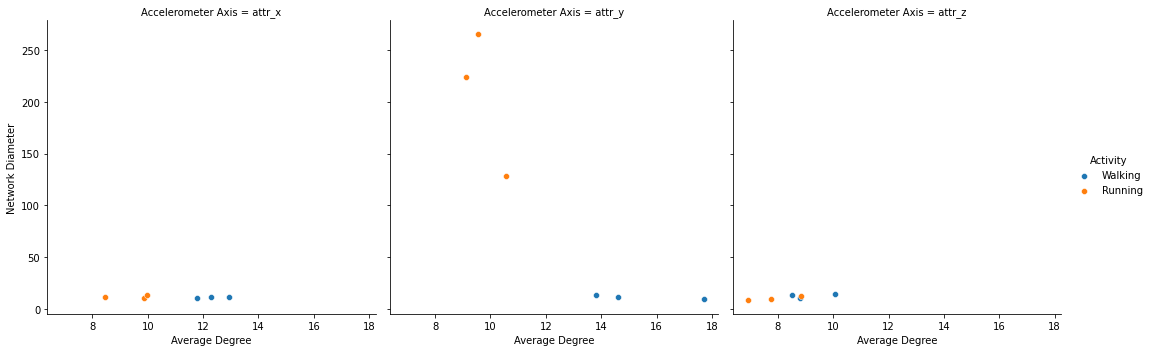

In [42]:
g = sns.FacetGrid(dfnvg_1, col="Accelerometer Axis" , hue="Activity", height=5)
g.map(sns.scatterplot, "Average Degree", "Network Diameter")
g.add_legend()

### Scatter Plots for Walking and Running-HVG

In [43]:
dfhvg = df[df['Method']=='HVG']
dfhvg_1 = dfhvg[(dfhvg['Activity']=='Walking') | (dfhvg['Activity']=='Running')]

In [44]:
dfhvg_1

,Method,Subject,Accelerometer Axis,Activity,Average Degree,Network Diameter,Average Path Length
12,HVG,3,attr_x,Walking,3.956989,27,12.853376
13,HVG,3,attr_y,Walking,3.964809,30,13.826172
14,HVG,3,attr_z,Walking,3.945259,25,8.433015
15,HVG,3,attr_x,Running,3.958944,21,8.987355
16,HVG,3,attr_y,Running,3.462366,275,91.439297
17,HVG,3,attr_z,Running,3.976540,16,7.510893
36,HVG,6,attr_x,Walking,3.955034,24,12.288310
37,HVG,6,attr_y,Walking,3.947214,33,13.952205
38,HVG,6,attr_z,Walking,3.947214,31,14.382741
39,HVG,6,attr_x,Running,3.958944,26,12.719300


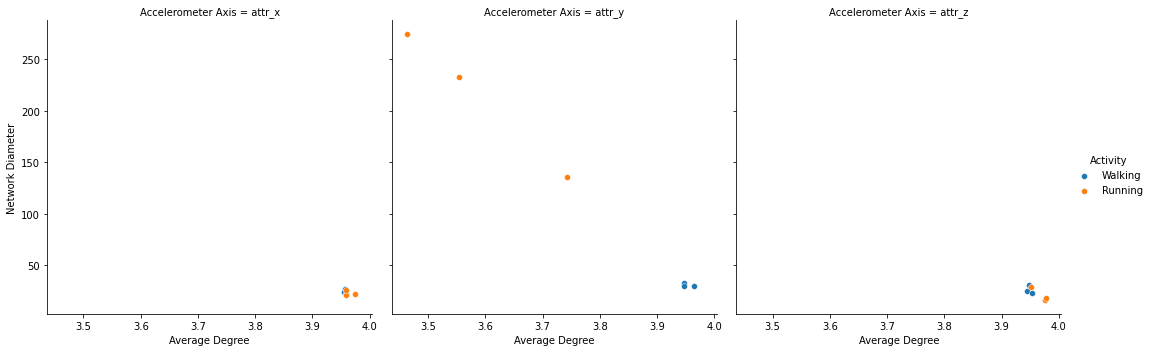

In [45]:
g = sns.FacetGrid(dfhvg_1, col="Accelerometer Axis" , hue="Activity", height=5)
g.map(sns.scatterplot, "Average Degree", "Network Diameter")
g.add_legend()

### Scatter Plots for Climbing Up and Climbing Down-NVG

In [46]:
dfnvg_2 = dfnvg[(dfnvg['Activity']=='Climbingup') | (dfnvg['Activity']=='Climbingdown')]

In [47]:
dfnvg_2

,Method,Subject,Accelerometer Axis,Activity,Average Degree,Network Diameter,Average Path Length
6,NVG,3,attr_x,Climbingup,10.860215,10,4.464223
7,NVG,3,attr_y,Climbingup,17.372434,11,4.525539
8,NVG,3,attr_z,Climbingup,9.550342,15,4.804900
9,NVG,3,attr_x,Climbingdown,11.071359,9,4.099435
10,NVG,3,attr_y,Climbingdown,16.357771,16,6.815907
11,NVG,3,attr_z,Climbingdown,8.492669,9,4.652520
30,NVG,6,attr_x,Climbingup,13.499511,9,4.209460
31,NVG,6,attr_y,Climbingup,12.930596,8,4.364813
32,NVG,6,attr_z,Climbingup,10.584555,10,5.076449
33,NVG,6,attr_x,Climbingdown,12.275660,10,4.471075


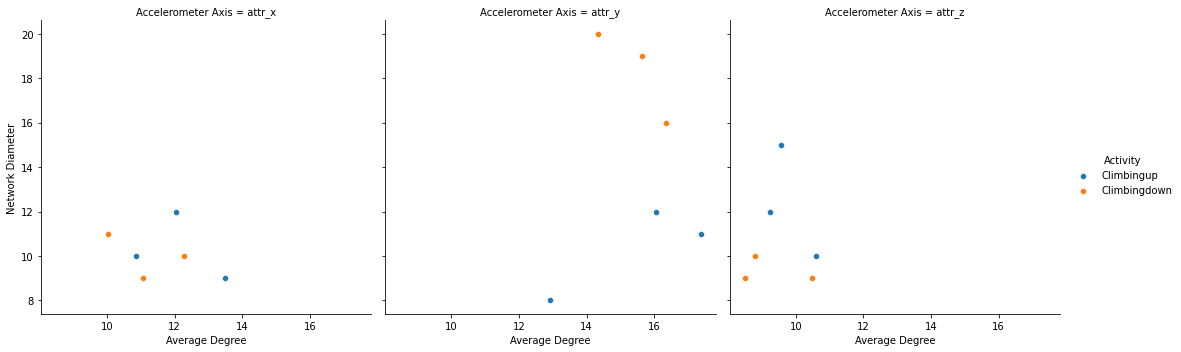

In [48]:
g = sns.FacetGrid(dfnvg_2, col="Accelerometer Axis" , hue="Activity", height=5)
g.map(sns.scatterplot, "Average Degree", "Network Diameter")
g.add_legend()

### Scatter Plots for Climbing Up and Climbing Down-HVG

In [49]:
dfhvg_2 = dfhvg[(dfhvg['Activity']=='Climbingup') | (dfhvg['Activity']=='Climbingdown')]

In [50]:
dfhvg_2

,Method,Subject,Accelerometer Axis,Activity,Average Degree,Network Diameter,Average Path Length
18,HVG,3,attr_x,Climbingup,3.945259,30,12.233043
19,HVG,3,attr_y,Climbingup,3.945259,34,14.178053
20,HVG,3,attr_z,Climbingup,3.929619,34,12.278183
21,HVG,3,attr_x,Climbingdown,3.956989,36,14.921762
22,HVG,3,attr_y,Climbingdown,3.935484,33,14.986022
23,HVG,3,attr_z,Climbingdown,3.939394,38,11.914705
42,HVG,6,attr_x,Climbingup,3.955034,32,13.875781
43,HVG,6,attr_y,Climbingup,3.970674,29,11.995139
44,HVG,6,attr_z,Climbingup,3.947214,32,13.943067
45,HVG,6,attr_x,Climbingdown,3.947214,31,13.647891


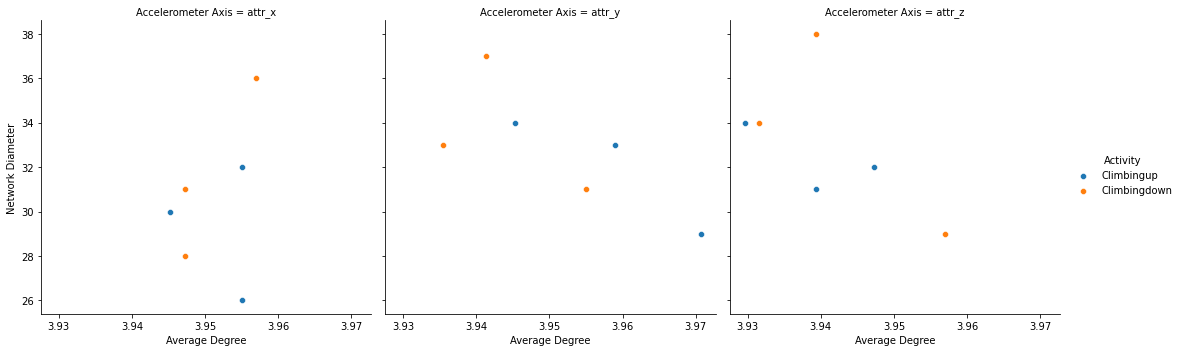

In [51]:
g = sns.FacetGrid(dfhvg_2, col="Accelerometer Axis" , hue="Activity", height=5)
g.map(sns.scatterplot, "Average Degree", "Network Diameter")
g.add_legend()

Task2 
Raw data processing: Check the data and isolate the data from King county
1. Upload the data of 2020, 2021 and 2022

In [5]:
import pandas as pd


In [6]:
df2020 = pd.read_csv("/Users/samchen/Downloads/XYY Project2/2020_US_Region_Mobility_Report.csv")
df2021 = pd.read_csv("/Users/samchen/Downloads/XYY Project2/2021_US_Region_Mobility_Report.csv")
df2022 = pd.read_csv("/Users/samchen/Downloads/XYY Project2/2022_US_Region_Mobility_Report.csv")

display(df2020.info())
display(df2021.info())
display(df2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812065 entries, 0 to 812064
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 812065 non-null  object 
 1   country_region                                      812065 non-null  object 
 2   sub_region_1                                        811744 non-null  object 
 3   sub_region_2                                        795373 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     16371 non-null   object 
 6   census_fips_code                                    795169 non-null  float64
 7   place_id                                            812065 non-null  object 
 8   date                                                812065 non-n

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951960 entries, 0 to 951959
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 951960 non-null  object 
 1   country_region                                      951960 non-null  object 
 2   sub_region_1                                        951595 non-null  object 
 3   sub_region_2                                        932980 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     18615 non-null   object 
 6   census_fips_code                                    932719 non-null  float64
 7   place_id                                            951960 non-null  object 
 8   date                                                951960 non-n

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747969 entries, 0 to 747968
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 747969 non-null  object 
 1   country_region                                      747969 non-null  object 
 2   sub_region_1                                        747681 non-null  object 
 3   sub_region_2                                        732993 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     14688 non-null   object 
 6   census_fips_code                                    732788 non-null  float64
 7   place_id                                            747969 non-null  object 
 8   date                                                747969 non-n

None

2. Isolate the data from King county and extract three feature columns, including “residential_percent_change_from_baseline”, “workplaces_percent_change_from_baseline”, and “grocery_and_pharmacy_percent_change_from_baseline”

In [7]:
# 2020 King County data
df2020_kc = df2020.loc[df2020["sub_region_2"]== "King County",["date","residential_percent_change_from_baseline","workplaces_percent_change_from_baseline","grocery_and_pharmacy_percent_change_from_baseline"]]
display(df2020_kc.info())

# 2021 King County data
df2021_kc = df2021.loc[df2021["sub_region_2"]== "King County",["date","residential_percent_change_from_baseline","workplaces_percent_change_from_baseline","grocery_and_pharmacy_percent_change_from_baseline"]]
display(df2021_kc.info())

# 2022 King County data
df2022_kc = df2022.loc[df2022["sub_region_2"]== "King County",["date","residential_percent_change_from_baseline","workplaces_percent_change_from_baseline","grocery_and_pharmacy_percent_change_from_baseline"]]
display(df2022_kc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 765150 to 765470
Data columns (total 4 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   date                                               321 non-null    object 
 1   residential_percent_change_from_baseline           321 non-null    float64
 2   workplaces_percent_change_from_baseline            321 non-null    float64
 3   grocery_and_pharmacy_percent_change_from_baseline  321 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 896869 to 897233
Data columns (total 4 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   date                                               365 non-null    object 
 1   residential_percent_change_from_baseline           365 non-null    float64
 2   workplaces_percent_change_from_baseline            365 non-null    float64
 3   grocery_and_pharmacy_percent_change_from_baseline  365 non-null    float64
dtypes: float64(3), object(1)
memory usage: 14.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 704562 to 704849
Data columns (total 4 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   date                                               288 non-null    object 
 1   residential_percent_change_from_baseline           288 non-null    float64
 2   workplaces_percent_change_from_baseline            288 non-null    float64
 3   grocery_and_pharmacy_percent_change_from_baseline  288 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.2+ KB


None

Tas2 Problem 1: Contact three dataframes for analysis

In [8]:
df=pd.concat([df2020_kc,df2021_kc,df2022_kc],axis=0,ignore_index=True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 4 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   date                                               974 non-null    object 
 1   residential_percent_change_from_baseline           974 non-null    float64
 2   workplaces_percent_change_from_baseline            974 non-null    float64
 3   grocery_and_pharmacy_percent_change_from_baseline  974 non-null    float64
dtypes: float64(3), object(1)
memory usage: 30.6+ KB


None

Task 2 Problem 2: Trim down time series to remove the months before April 2020.

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
display(df.info())
df_trim = df.loc[(df['date'] > '2020-03-31')]
display(df_trim.info())

## Conver the 'date' to index
data_original = df_trim.set_index("date")
df_re = data_original[['residential_percent_change_from_baseline']]
df_wo = data_original[['workplaces_percent_change_from_baseline']]
df_gp = data_original[['grocery_and_pharmacy_percent_change_from_baseline']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 4 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   date                                               974 non-null    datetime64[ns]
 1   residential_percent_change_from_baseline           974 non-null    float64       
 2   workplaces_percent_change_from_baseline            974 non-null    float64       
 3   grocery_and_pharmacy_percent_change_from_baseline  974 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 30.6 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 46 to 973
Data columns (total 4 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   date                                               928 non-null    datetime64[ns]
 1   residential_percent_change_from_baseline           928 non-null    float64       
 2   workplaces_percent_change_from_baseline            928 non-null    float64       
 3   grocery_and_pharmacy_percent_change_from_baseline  928 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 36.2 KB


None

Task2 Problem 3: Time Series Decomposition for each of the 3 time series and plot the results.

3-1 Check the data for null value

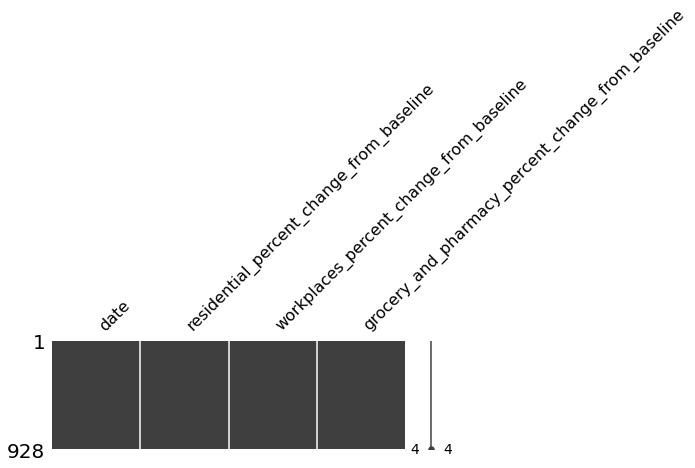

In [10]:
#Import required libraries
import numpy as np
import missingno as mno
import matplotlib.pyplot as plt

# check Null values
mno.matrix(df_trim, figsize = (7, 2))
plt.show()

Task2 Problem 3: Time Series Decomposition for each of the 3 time series and plot the results.

3-2 Additive Time Series Decomposition

3-2-1 "Residential percent changes" decomposition from 2020-2022

2020-2022 King County residential percent change from baseline


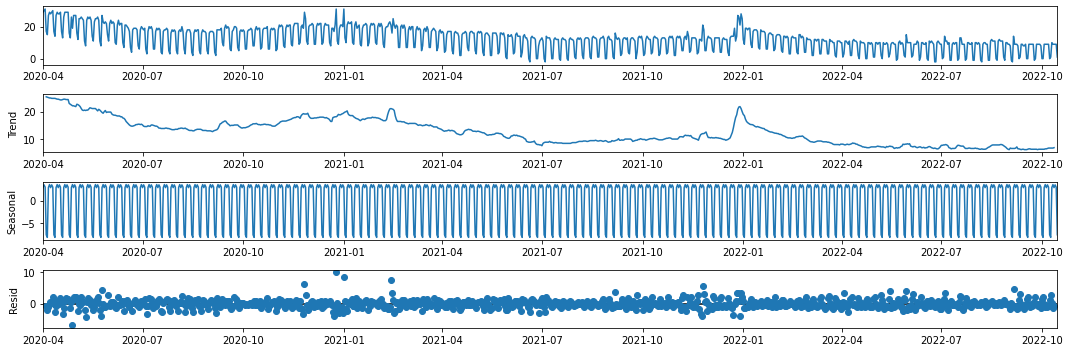

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

resident_decom = seasonal_decompose(df_re,model="additive")
plt.rcParams['figure.figsize'] = [15, 5]
resident_decom.plot()
print("2020-2022 King County residential percent change from baseline")
plt.show()

3-2-2 "Workplaces percent changes" decomposition from 2020-2022

2020-2022 King County Workplaces percent change from baseline


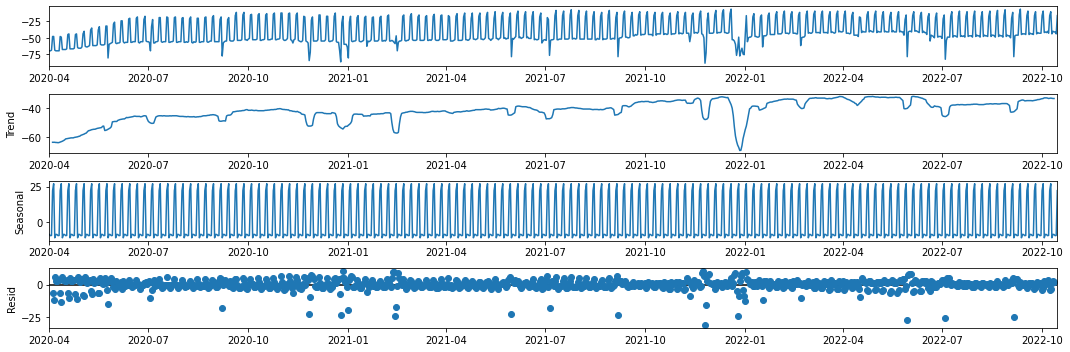

In [12]:
workplaces_decom = seasonal_decompose(df_wo,model="additive")
workplaces_decom.plot()
print("2020-2022 King County Workplaces percent change from baseline")
plt.show()

3-2-3 "Grocery and Pharmacy percent changes" decomposition from 2020-2022

2020-2022 King County Grocery and Pharmacy percent change from baseline


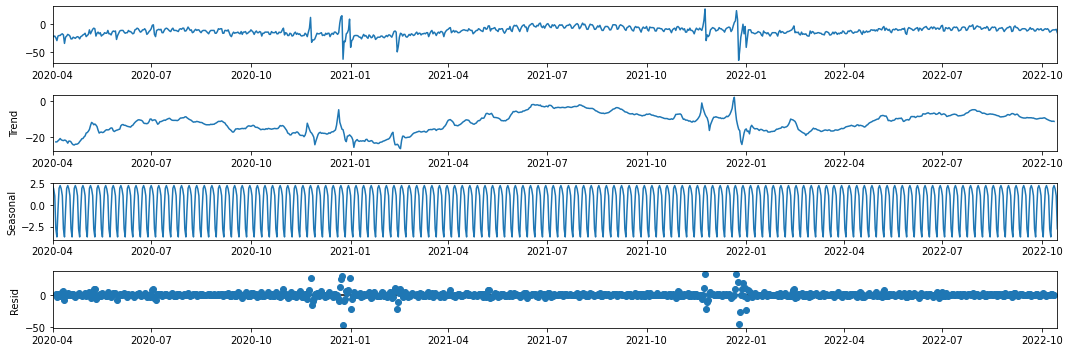

In [13]:
gp_decom = seasonal_decompose(df_gp, model="additive")
gp_decom.plot()
print("2020-2022 King County Grocery and Pharmacy percent change from baseline")
plt.show()

Task 2 Problem 4: Exponential Smoothing (ES) forecasting model and forecast evaluation metrics.

4-1 Exponential Smoothing (ES) forecasting models

4-1-1 We can see clear seasonality from the visual decompistion plot. And we try all four ES models by using the "training" data set.

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Split the data into two sets: training (df_train, about 82% of original data) and test (df_test, about 18% of original data) set

df_train = df_trim.loc[(df_trim['date'] <= '2022-4-30')]
display(df_train .info())

df_test = df_trim.loc[(df_trim['date'] > '2022-4-30')]
display(df_test .info())

# Conver the 'date' to index
data_train = df_train.set_index("date")

data_test = df_test.set_index("date")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 46 to 805
Data columns (total 4 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   date                                               760 non-null    datetime64[ns]
 1   residential_percent_change_from_baseline           760 non-null    float64       
 2   workplaces_percent_change_from_baseline            760 non-null    float64       
 3   grocery_and_pharmacy_percent_change_from_baseline  760 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 29.7 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 806 to 973
Data columns (total 4 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   date                                               168 non-null    datetime64[ns]
 1   residential_percent_change_from_baseline           168 non-null    float64       
 2   workplaces_percent_change_from_baseline            168 non-null    float64       
 3   grocery_and_pharmacy_percent_change_from_baseline  168 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 6.6 KB


None

/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/var/folders/z8/3j_vdyns1s54trdwllv8rxf40000gn/T/ipykernel_18960/2382761388.py:17: SettingWithCopyWarning: 
A value is tryin

2020-2022 King County Residential percent change from baseline


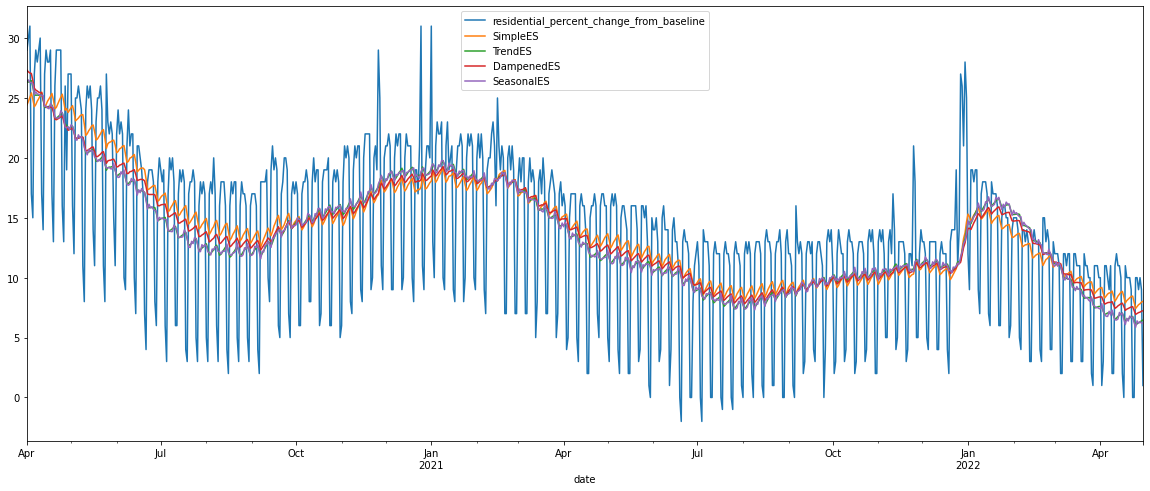

In [15]:
# Residential percent changes data
data_train_re = data_train.iloc[:,[0]]

# Simple ES model
simple_es_re = SimpleExpSmoothing(data_train_re["residential_percent_change_from_baseline"])

# Trend predition only
trend_es_re = ExponentialSmoothing(data_train_re["residential_percent_change_from_baseline"], trend="add")

# Dampened trend predition model
dampened_es_re = ExponentialSmoothing(data_train_re["residential_percent_change_from_baseline"], trend="add", damped_trend=True)

# Seasonal and trend predition model
seasonal_es_re = ExponentialSmoothing(data_train_re["residential_percent_change_from_baseline"], trend="add", seasonal="add", seasonal_periods=12)

# Add the values for each model
data_train_re["SimpleES"] = simple_es_re.fit().fittedvalues
data_train_re["TrendES"] = trend_es_re.fit().fittedvalues
data_train_re["DampenedES"] = dampened_es_re.fit().fittedvalues
data_train_re["SeasonalES"] = seasonal_es_re.fit().fittedvalues

# plot show 
print("2020-2022 King County Residential percent change from baseline")
data_train_re.plot(figsize=(20,8))
plt.show()


/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/var/folders/z8/3j_vdyns1s54trdwllv8rxf40000gn/T/ipykernel_18960/1067728725.py:17: SettingWithCopyWarning: 
A value is tryin

2020-2022 King County Workplaces percent change from baseline


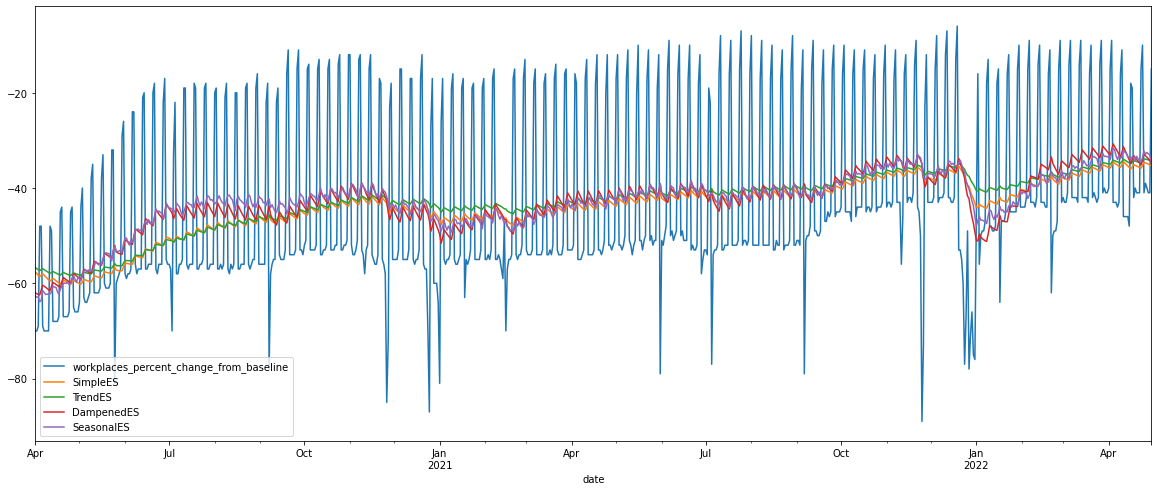

In [16]:
# workplaces percent changes data
data_train_wo = data_train.iloc[:,[1]]

# Simple ES model
simple_es_wo = SimpleExpSmoothing(data_train_wo["workplaces_percent_change_from_baseline"])

# Trend predition only
trend_es_wo = ExponentialSmoothing(data_train_wo["workplaces_percent_change_from_baseline"], trend="add")

# Dampened trend predition model
dampened_es_wo = ExponentialSmoothing(data_train_wo["workplaces_percent_change_from_baseline"], trend="add", damped_trend=True)

# Seasonal and trend predition model
seasonal_es_wo = ExponentialSmoothing(data_train_wo["workplaces_percent_change_from_baseline"], trend="add", seasonal="add", seasonal_periods=12)

# Add the values for each model
data_train_wo["SimpleES"] = simple_es_wo.fit().fittedvalues
data_train_wo["TrendES"] = trend_es_wo.fit().fittedvalues
data_train_wo["DampenedES"] = dampened_es_wo.fit().fittedvalues
data_train_wo["SeasonalES"] = seasonal_es_wo.fit().fittedvalues

# plot show 
print("2020-2022 King County Workplaces percent change from baseline")
data_train_wo.plot(figsize=(20,8))
plt.show()


/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/var/folders/z8/3j_vdyns1s54trdwllv8rxf40000gn/T/ipykernel_18960/2889499480.py:17: SettingWithCopyWarning: 
A value is tryin

2020-2022 King County Grocery and Pharmacy percent change from baseline


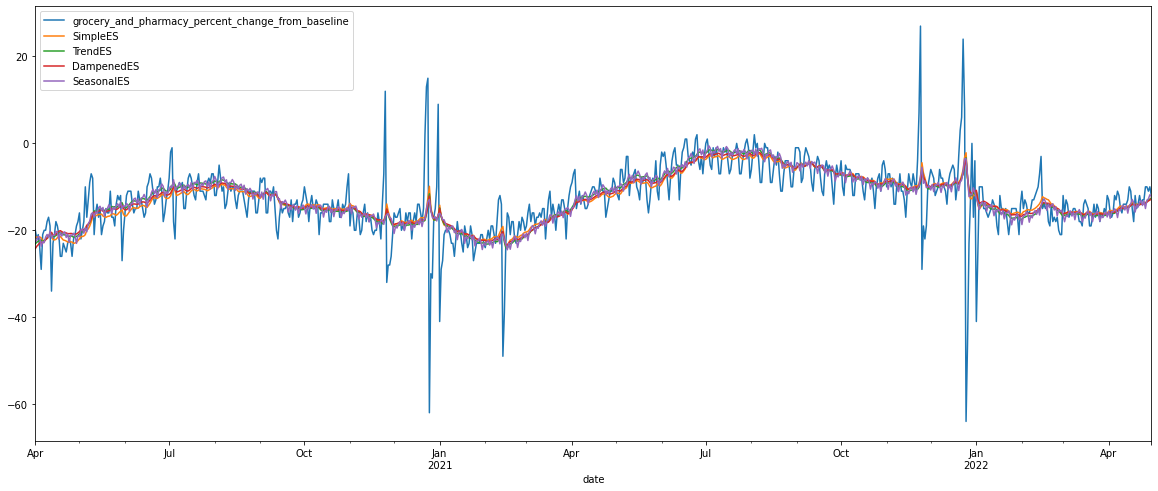

In [17]:
# Grocery and Pharmacy percent changes data
data_train_gp = data_train.iloc[:,[2]]

# Simple ES model
simple_es_gp = SimpleExpSmoothing(data_train_gp["grocery_and_pharmacy_percent_change_from_baseline"])

# Trend predition only
trend_es_gp = ExponentialSmoothing(data_train_gp["grocery_and_pharmacy_percent_change_from_baseline"], trend="add")

# Dampened trend predition model
dampened_es_gp = ExponentialSmoothing(data_train_gp["grocery_and_pharmacy_percent_change_from_baseline"], trend="add", damped_trend=True)

# Seasonal and trend predition model
seasonal_es_gp = ExponentialSmoothing(data_train_gp["grocery_and_pharmacy_percent_change_from_baseline"], trend="add", seasonal="add", seasonal_periods=12)

# Add the values for each model
data_train_gp["SimpleES"] = simple_es_gp.fit().fittedvalues
data_train_gp["TrendES"] = trend_es_gp.fit().fittedvalues
data_train_gp["DampenedES"] = dampened_es_gp.fit().fittedvalues
data_train_gp["SeasonalES"] = seasonal_es_gp.fit().fittedvalues

# plot show 
print("2020-2022 King County Grocery and Pharmacy percent change from baseline")
data_train_gp.plot(figsize=(20,8))
plt.show()


4-1-2 Test the models by using the "test" data set

/var/folders/z8/3j_vdyns1s54trdwllv8rxf40000gn/T/ipykernel_18960/158135298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_re["SimpleES"] = simple_es_re.fit().forecast(180)


2020-2022 King County Residential percent change from baseline


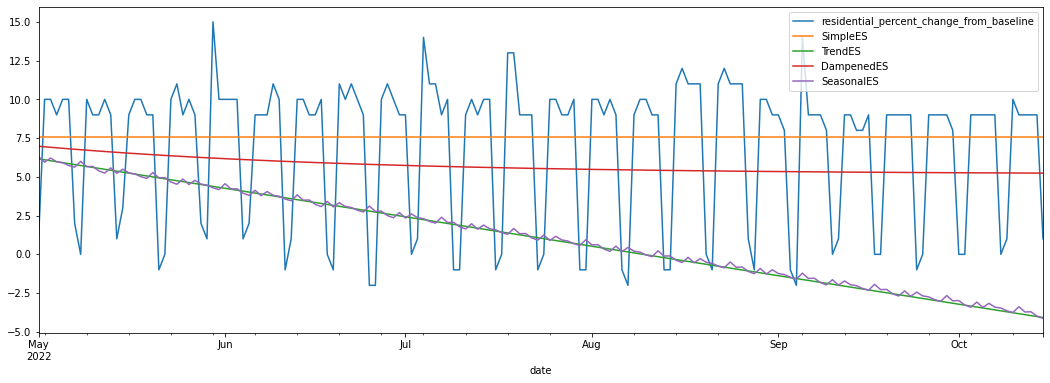

In [18]:
# Residential percent changes data
data_test_re = data_test.iloc[:,[0]]

data_test_re["SimpleES"] = simple_es_re.fit().forecast(180)
data_test_re["TrendES"] = trend_es_re.fit().forecast(180)
data_test_re["DampenedES"] = dampened_es_re.fit().forecast(180)
data_test_re["SeasonalES"] = seasonal_es_re.fit().forecast(180)

# show plot
print("2020-2022 King County Residential percent change from baseline")
data_test_re.plot(figsize=(18,6))
plt.show()


/var/folders/z8/3j_vdyns1s54trdwllv8rxf40000gn/T/ipykernel_18960/2754407165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_wo["SimpleES"] = simple_es_wo.fit().forecast(180)


2020-2022 King County Workplaces percent change from baseline


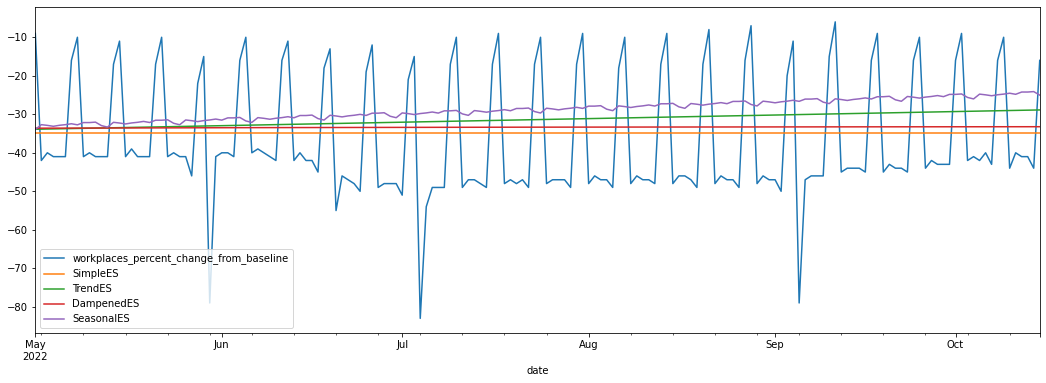

In [19]:
# Workplaces percent changes data
data_test_wo = data_test.iloc[:,[1]]

data_test_wo["SimpleES"] = simple_es_wo.fit().forecast(180)
data_test_wo["TrendES"] = trend_es_wo.fit().forecast(180)
data_test_wo["DampenedES"] = dampened_es_wo.fit().forecast(180)
data_test_wo["SeasonalES"] = seasonal_es_wo.fit().forecast(180)

# show plot
print("2020-2022 King County Workplaces percent change from baseline")
data_test_wo.plot(figsize=(18,6))
plt.show()


/var/folders/z8/3j_vdyns1s54trdwllv8rxf40000gn/T/ipykernel_18960/2914482996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_gp["SimpleES"] = simple_es_gp.fit().forecast(180)


2020-2022 King County Grocery and Pharmacy percent change from baseline


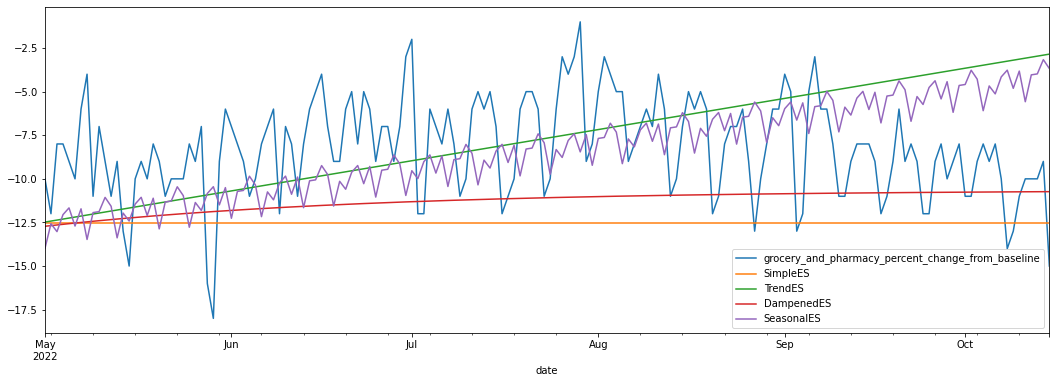

In [20]:
# Grocery and Pharmacy percent changes data
data_test_gp = data_test.iloc[:,[2]]

data_test_gp["SimpleES"] = simple_es_gp.fit().forecast(180)
data_test_gp["TrendES"] = trend_es_gp.fit().forecast(180)
data_test_gp["DampenedES"] = dampened_es_gp.fit().forecast(180)
data_test_gp["SeasonalES"] = seasonal_es_gp.fit().forecast(180)

# show plot
print("2020-2022 King County Grocery and Pharmacy percent change from baseline")
data_test_gp.plot(figsize=(18,6))
plt.show()

4-2 Use MAE, RMSE, and MAPE forecast evaluation metrics to evaluate the four models.

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import seaborn as sns

def score_all_metrics(data: pd.DataFrame, col_names: list,t:str):
    """Score a set of predictions on all metrics"""

    mae = []
    rmse = []
    mape = []

    for col in col_names:
        mae.append(mean_absolute_error(data[t], data[col]))
        rmse.append(mean_squared_error(data[t], data[col], squared=False))
        mape.append(mean_absolute_percentage_error(data[t], data[col]))

    results_df = pd.DataFrame({
        "ModelName": col_names,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape
    })

    return results_df
# Residential percent changes data
print("2020-2022 King County Residential percent change from baseline ES model evaluation") 

exp_smooth_scores_re = score_all_metrics(data_test_re, ["SimpleES","TrendES","DampenedES","SeasonalES"],'residential_percent_change_from_baseline')

cm = sns.color_palette("vlag", as_cmap=True)
exp_smooth_scores_re.style.background_gradient(cmap=cm)

2020-2022 King County Residential percent change from baseline ES model evaluation


,ModelName,MAE,RMSE,MAPE
0,SimpleES,3.756902,4.653591,2845193139206232.500000
1,TrendES,7.006579,7.962944,1045066980833753.875000
2,DampenedES,4.556882,4.773582,2096538161201318.000000
3,SeasonalES,6.953448,7.892770,1029165848643370.625000


MAE is the mean of the absolute error and is more robust to outliers. RMSE is defined as the square root of the average squared error and is more sensitive to outliers. While MAPE measures the average of the percentage errors between the predicted and actual values.

Minimizing MAE, RMSE and MAPE indicates a "better" forecast model. Given the above evaluation matrics, SimpleES is the best during the test period in terms of MAE and RMSE but has the worst MAPE. TrendES is the best in terms of MAPE but has the worst MAE and RMSE. DampenedES model has overall three 'smaller' parameters. 

In short,  DampenedES is the best forecast model to forecast the changes of Residential percent changes in the "test" data set (2022/5 - 2022/10) compared to the other three models.

In [22]:
# Workplaces percent changes data
print("2020-2022 King County Workplaces percent change from baseline ES model evaluation") 

exp_smooth_scores_wo = score_all_metrics(data_test_wo, ["SimpleES","TrendES","DampenedES","SeasonalES"],'workplaces_percent_change_from_baseline')

cm = sns.color_palette("vlag", as_cmap=True)
exp_smooth_scores_wo.style.background_gradient(cmap=cm)



2020-2022 King County Workplaces percent change from baseline ES model evaluation


,ModelName,MAE,RMSE,MAPE
0,SimpleES,13.877942,15.755797,0.679602
1,TrendES,15.325285,16.581924,0.653049
2,DampenedES,14.472683,15.981618,0.669415
3,SeasonalES,16.448985,17.716668,0.632656


Given the above evaluation matrics, SimpleES is the best during the test period in terms of MAE and RMSE but has the worst MAPE. The other three models have the smaller MAPE but the worst MAE and RMSE. High errors during "low-demand periods" (extremely small values) will significantly impact MAPE. We saw some extremely small values in some specific months, from the data_test_wo plot. In this case, we will use MAE and RMSE to evaluate the models.

In short, SimpleES is the best forecast model to forecast the changes of Workplaces percent changes in the "test" data set (2022/5 - 2022/10) compared to the other three models.

In [23]:
# Grocery and pharmacy percent changes data
print("2020-2022 King County Grocery and pharmacy percent change from baseline ES model evaluation") 

exp_smooth_scores_gp = score_all_metrics(data_test_gp, ["SimpleES","TrendES","DampenedES","SeasonalES"],'grocery_and_pharmacy_percent_change_from_baseline')

cm = sns.color_palette("vlag", as_cmap=True)
exp_smooth_scores_gp.style.background_gradient(cmap=cm)



2020-2022 King County Grocery and pharmacy percent change from baseline ES model evaluation


,ModelName,MAE,RMSE,MAPE
0,SimpleES,4.485650,5.121333,0.808374
1,TrendES,3.330358,4.063762,0.479224
2,DampenedES,3.488716,4.133930,0.644873
3,SeasonalES,3.292379,3.928321,0.503315


Given the above evaluation matrics, SeasonalES is the best during the test period which has three smallest parameters.

In short, SeasonalES is the best forecast model to forecast the changes of grocery and pharmacy percent changes in the "test" data set (2022/5 - 2022/10) compared to the other three models.

Task 2 Problem 5: Build forecasting model using ARIMA

5-1 Using ARIMA model

5-1-1 Build ARIMA models by using the "training" data set.

In [1]:
#!pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency i

2020-2022 King County Residential percent change from baseline ARIMA models


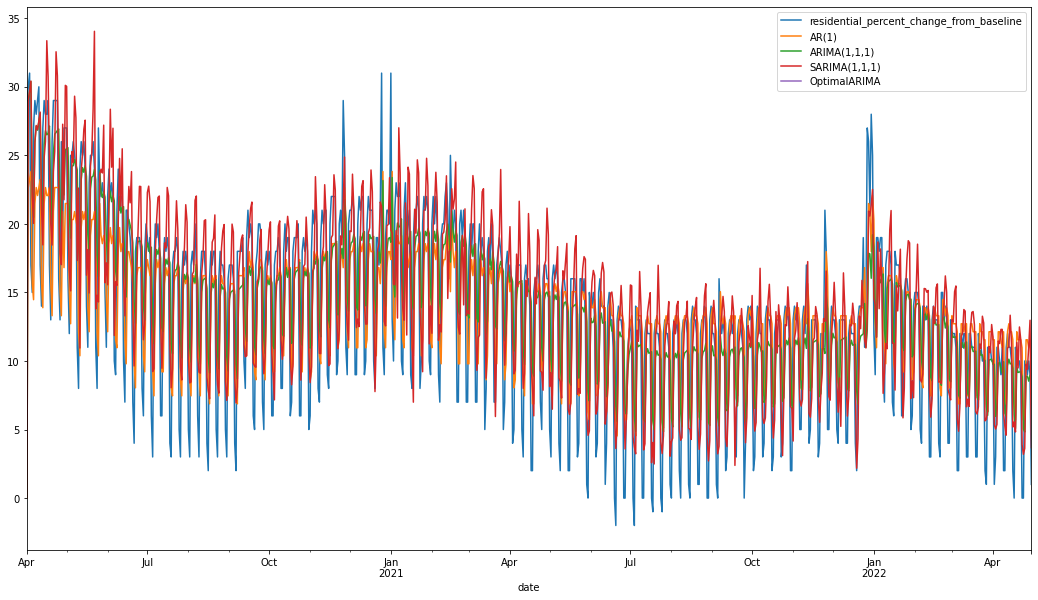

In [24]:
# Residential percent changes data

# AR(1)
ar_1_re = ARIMA(data_train_re['residential_percent_change_from_baseline'], order=(1,0,0))

# ARIMA(1,1,1)
arima_1_re = ARIMA(data_train_re['residential_percent_change_from_baseline'], order=(1,1,1))

# S-ARIMA (1,1,1)(1,0,1)
sarima_re = ARIMA(data_train_re['residential_percent_change_from_baseline'], order=(1,1,1), seasonal_order=(1,0,1,12))

# AUTO-ARIMA
fit_model_re = auto_arima(data_train_re['residential_percent_change_from_baseline'], m=12)

#Add values for each model
data_train_re["AR(1)"] = ar_1_re.fit().fittedvalues
data_train_re["ARIMA(1,1,1)"] = arima_1_re.fit().fittedvalues
data_train_re["SARIMA(1,1,1)"] = sarima_re.fit().fittedvalues
data_train_re["OptimalARIMA"] = fit_model_re.predict(24)

# Show plot
print("2020-2022 King County Residential percent change from baseline ARIMA models") 
data_train_re[["residential_percent_change_from_baseline","AR(1)","ARIMA(1,1,1)","SARIMA(1,1,1)","OptimalARIMA"]].plot(figsize=(18,10))
plt.show()

/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency i

2020-2022 King County Workplaces percent change from baseline ARIMA models


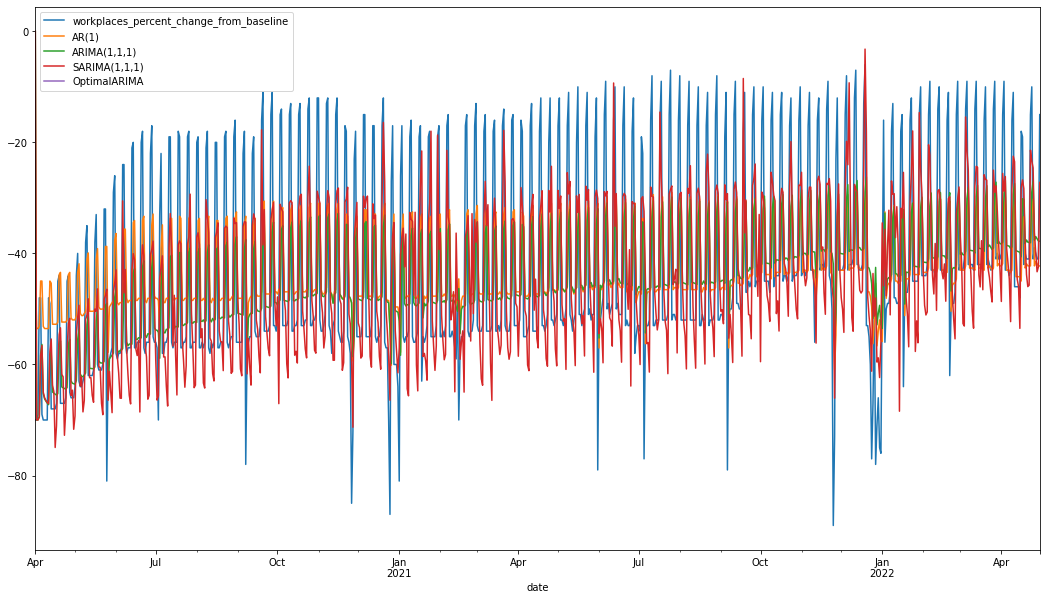

In [25]:
# Workplaces percent changes data
# AR(1)
ar_1_wo = ARIMA(data_train_wo['workplaces_percent_change_from_baseline'], order=(1,0,0))

# ARIMA(1,1,1)
arima_1_wo = ARIMA(data_train_wo['workplaces_percent_change_from_baseline'], order=(1,1,1))

# S-ARIMA (1,1,1)(1,0,1)
sarima_wo = ARIMA(data_train_wo['workplaces_percent_change_from_baseline'], order=(1,1,1), seasonal_order=(1,0,1,12))

# AUTO-ARIMA
fit_model_wo = auto_arima(data_train_wo['workplaces_percent_change_from_baseline'], m=12)

#Add values for each model
data_train_wo["AR(1)"] = ar_1_wo.fit().fittedvalues
data_train_wo["ARIMA(1,1,1)"] = arima_1_wo.fit().fittedvalues
data_train_wo["SARIMA(1,1,1)"] = sarima_wo.fit().fittedvalues
data_train_wo["OptimalARIMA"] = fit_model_wo.predict(24)

# Show plot
print("2020-2022 King County Workplaces percent change from baseline ARIMA models") 
data_train_wo[["workplaces_percent_change_from_baseline","AR(1)","ARIMA(1,1,1)","SARIMA(1,1,1)","OptimalARIMA"]].plot(figsize=(18,10))
plt.show()


/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency i

2020-2022 King County grocery and pharmacy percent change from baseline ARIMA models


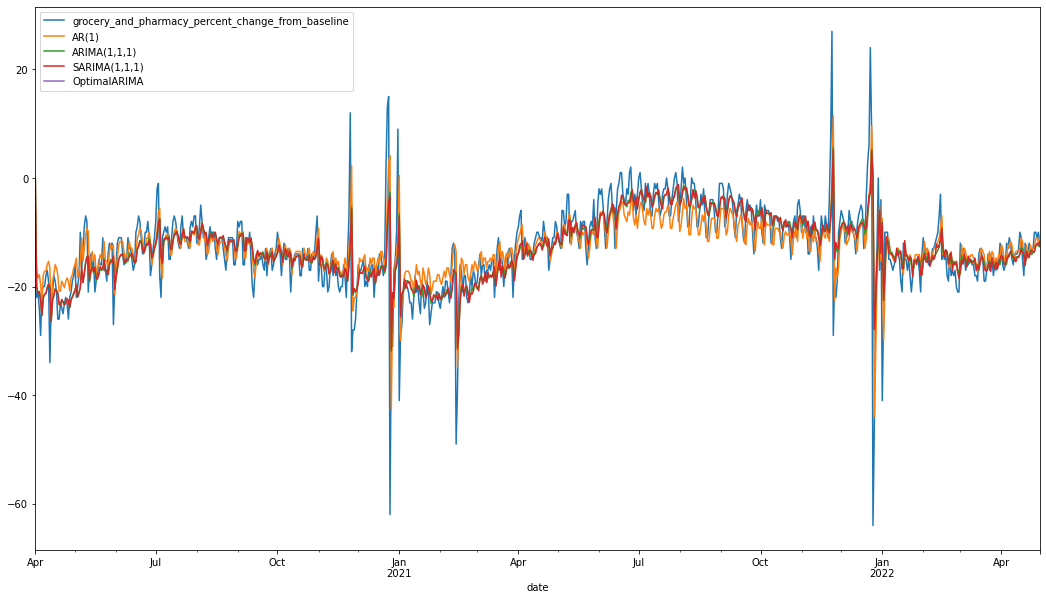

In [26]:
# Grocery and pharmacy percent changes data
# AR(1)
ar_1_gp = ARIMA(data_train_gp['grocery_and_pharmacy_percent_change_from_baseline'], order=(1,0,0))

# ARIMA(1,1,1)
arima_1_gp = ARIMA(data_train_gp['grocery_and_pharmacy_percent_change_from_baseline'], order=(1,1,1))

# S-ARIMA (1,1,1)(1,0,1)
sarima_gp = ARIMA(data_train_gp['grocery_and_pharmacy_percent_change_from_baseline'], order=(1,1,1), seasonal_order=(1,0,1,12))

# AUTO-ARIMA
fit_model_gp = auto_arima(data_train_gp['grocery_and_pharmacy_percent_change_from_baseline'], m=12)

#Add values for each model
data_train_gp["AR(1)"] = ar_1_gp.fit().fittedvalues
data_train_gp["ARIMA(1,1,1)"] = arima_1_gp.fit().fittedvalues
data_train_gp["SARIMA(1,1,1)"] = sarima_gp.fit().fittedvalues
data_train_gp["OptimalARIMA"] = fit_model_gp.predict(24)

# Show plot
print("2020-2022 King County grocery and pharmacy percent change from baseline ARIMA models") 
data_train_gp[["grocery_and_pharmacy_percent_change_from_baseline","AR(1)","ARIMA(1,1,1)","SARIMA(1,1,1)","OptimalARIMA"]].plot(figsize=(18,10))
plt.show()

5-1-2 Test ARIMA models by using the "test" data set.

2020-2022 King County Residential percent change from baseline ARIMA models Test


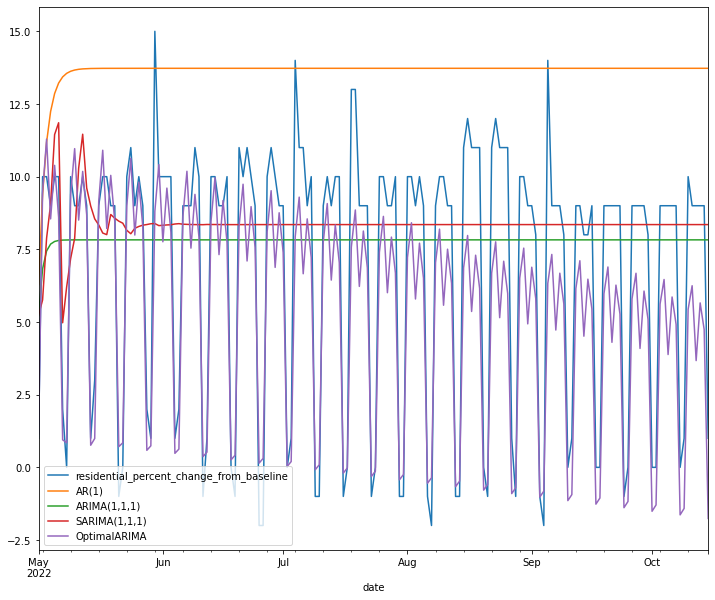

In [27]:
# Residential percent changes data
data_test_re["AR(1)"] = ar_1_re.fit().forecast(180)
data_test_re["ARIMA(1,1,1)"] = arima_1_re.fit().forecast(180)
data_test_re["SARIMA(1,1,1)"] = sarima_re.fit().forecast(180)
data_test_re["OptimalARIMA"] = fit_model_re.predict(180)

#Show plot
print("2020-2022 King County Residential percent change from baseline ARIMA models Test") 
data_test_re[["residential_percent_change_from_baseline","AR(1)","ARIMA(1,1,1)","SARIMA(1,1,1)","OptimalARIMA"]].plot(figsize=(12,10))
plt.show()

2020-2022 King County Workplaces percent change from baseline ARIMA models Test


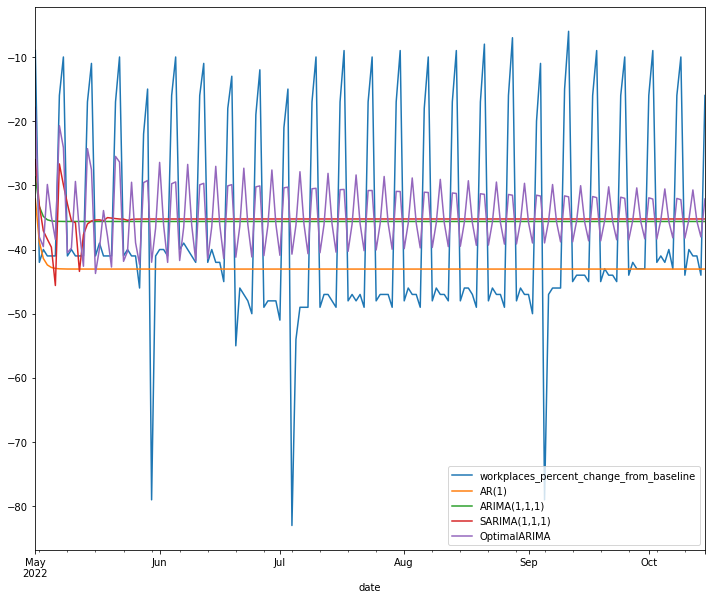

In [28]:
# Workplaces percent changes data
data_test_wo["AR(1)"] = ar_1_wo.fit().forecast(180)
data_test_wo["ARIMA(1,1,1)"] = arima_1_wo.fit().forecast(180)
data_test_wo["SARIMA(1,1,1)"] = sarima_wo.fit().forecast(180)
data_test_wo["OptimalARIMA"] = fit_model_wo.predict(180)

#Show plot
print("2020-2022 King County Workplaces percent change from baseline ARIMA models Test") 
data_test_wo[["workplaces_percent_change_from_baseline","AR(1)","ARIMA(1,1,1)","SARIMA(1,1,1)","OptimalARIMA"]].plot(figsize=(12,10))
plt.show()

/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2020-2022 King County grocery and pharmacy percent change from baseline ARIMA models Test


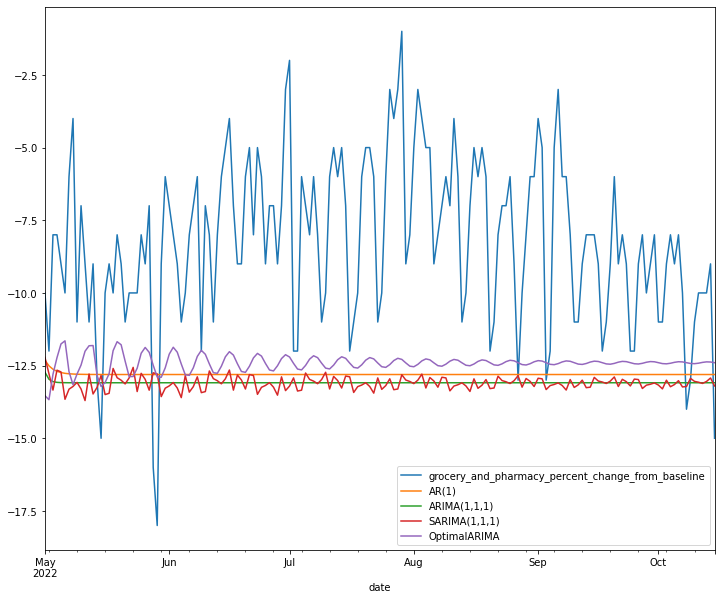

In [29]:
# Grocery and pharmacy percent changes data
data_test_gp["AR(1)"] = ar_1_gp.fit().forecast(180)
data_test_gp["ARIMA(1,1,1)"] = arima_1_gp.fit().forecast(180)
data_test_gp["SARIMA(1,1,1)"] = sarima_gp.fit().forecast(180)
data_test_gp["OptimalARIMA"] = fit_model_gp.predict(180)

#Show plot
print("2020-2022 King County grocery and pharmacy percent change from baseline ARIMA models Test") 
data_test_gp[["grocery_and_pharmacy_percent_change_from_baseline","AR(1)","ARIMA(1,1,1)","SARIMA(1,1,1)","OptimalARIMA"]].plot(figsize=(12,10))
plt.show()


5-2 Evaluation metrics to evaluate the four arima models

In [30]:
# Residential percent changes data
arima_scores_re = score_all_metrics(data_test_re, ["AR(1)","ARIMA(1,1,1)","SARIMA(1,1,1)","OptimalARIMA"],'residential_percent_change_from_baseline')
cm = sns.color_palette("vlag", as_cmap=True)

print("2020-2022 King County Residential percent change from baseline ARIMA model evaluation")
arima_scores_re.style.background_gradient(cmap=cm)

2020-2022 King County Residential percent change from baseline ARIMA model evaluation


,ModelName,MAE,RMSE,MAPE
0,AR(1),6.703312,8.128521,5147196234836754.000000
1,"ARIMA(1,1,1)",3.645888,4.679859,2937020190449081.000000
2,"SARIMA(1,1,1)",3.434594,4.785281,3077921406057681.500000
3,OptimalARIMA,2.046092,2.561958,321626271277718.937500


Based the above metrics,Auto-ARIMA is the best during the test period which has three smallest parameters.
That is, Auto-ARIMA, the best forecast model to forecast the changes of residential percent changes in the "test" data set (2022/5 - 2022/10) compared to the other three models.

In [31]:
# Workplaces percent changes data
arima_scores_wo = score_all_metrics(data_test_wo, ["AR(1)","ARIMA(1,1,1)","SARIMA(1,1,1)","OptimalARIMA"],'workplaces_percent_change_from_baseline')
cm = sns.color_palette("vlag", as_cmap=True)

print("2020-2022 King County Workplaces percent change from baseline ARIMA model evaluation")
arima_scores_wo.style.background_gradient(cmap=cm)

2020-2022 King County Workplaces percent change from baseline ARIMA model evaluation


,ModelName,MAE,RMSE,MAPE
0,AR(1),11.305731,16.820546,0.757992
1,"ARIMA(1,1,1)",13.482419,15.626118,0.681825
2,"SARIMA(1,1,1)",13.459554,15.528592,0.669111
3,OptimalARIMA,11.450664,13.468647,0.546337


Based the above metrics,Auto-ARIMA is the best during the test period which has three smallest parameters.
That is, Auto-ARIMA, the best forecast model to forecast the changes of workplace percent changes in the "test" data set (2022/5 - 2022/10) compared to the other three models.

In [32]:
# Grocery and pharmacy percent changes data
arima_scores_gp = score_all_metrics(data_test_gp, ["AR(1)","ARIMA(1,1,1)","SARIMA(1,1,1)","OptimalARIMA"],'grocery_and_pharmacy_percent_change_from_baseline')
cm = sns.color_palette("vlag", as_cmap=True)

print("2020-2022 King County Grocery and pharmacy percent change from baseline ARIMA model evaluation")
arima_scores_gp.style.background_gradient(cmap=cm)

2020-2022 King County Grocery and pharmacy percent change from baseline ARIMA model evaluation


,ModelName,MAE,RMSE,MAPE
0,AR(1),4.730506,5.355754,0.845971
1,"ARIMA(1,1,1)",4.992099,5.601441,0.885275
2,"SARIMA(1,1,1)",5.016706,5.623438,0.887017
3,OptimalARIMA,4.367388,5.003641,0.788873


Based the above metrics,Auto-ARIMA is the best during the test period which has three smallest parameters.
That is, Auto-ARIMA, the best forecast model to forecast the changes of grocery and pharmacy percent changes in the "test" data set (2022/5 - 2022/10) compared to the other three models.

Task 2 Problem 6: Compare the best ES and best ARIMA models

6-1 Residential time series 

In [33]:
comparison_scores_re = score_all_metrics(data_test_re, ["DampenedES","OptimalARIMA"],'residential_percent_change_from_baseline')

cm = sns.color_palette("vlag", as_cmap=True)
comparison_scores_re.style.background_gradient(cmap=cm)

,ModelName,MAE,RMSE,MAPE
0,DampenedES,4.556882,4.773582,2096538161201318.000000
1,OptimalARIMA,2.046092,2.561958,321626271277718.937500


Based the above metrics,Auto-ARIMA is better in terms of smaller MAE,RMASE and MAPE. Auto-ARIMA does better to forecast the changes of residential percent changes compared to the ES model.

6-2 Workplaces time series

In [34]:
comparison_scores_wo = score_all_metrics(data_test_wo, ["SimpleES","OptimalARIMA"],'workplaces_percent_change_from_baseline')

cm = sns.color_palette("vlag", as_cmap=True)
comparison_scores_wo.style.background_gradient(cmap=cm)

,ModelName,MAE,RMSE,MAPE
0,SimpleES,13.877942,15.755797,0.679602
1,OptimalARIMA,11.450664,13.468647,0.546337


Based the above metrics,Auto-ARIMA is better in terms of smaller MAE,RMASE and MAPE. Auto-ARIMA does better to forecast the changes of workplaces percent changes compared to the ES model.

6-3 Grocery and pharmacy tiem series

In [35]:
comparison_scores_gp = score_all_metrics(data_test_gp, ["SeasonalES","OptimalARIMA"],'grocery_and_pharmacy_percent_change_from_baseline')

cm = sns.color_palette("vlag", as_cmap=True)
comparison_scores_gp.style.background_gradient(cmap=cm)



,ModelName,MAE,RMSE,MAPE
0,SeasonalES,3.292379,3.928321,0.503315
1,OptimalARIMA,4.367388,5.003641,0.788873


Based the above metrics,SeasonalES model is better in terms of smaller MAE,RMASE and MAPE. SeasonalES does better to forecast the changes of grocery and pharmacy percent changes compared to the ES model.

Task 2 Problem 7

7-1 Residential time series and forecast the rest of 2022.

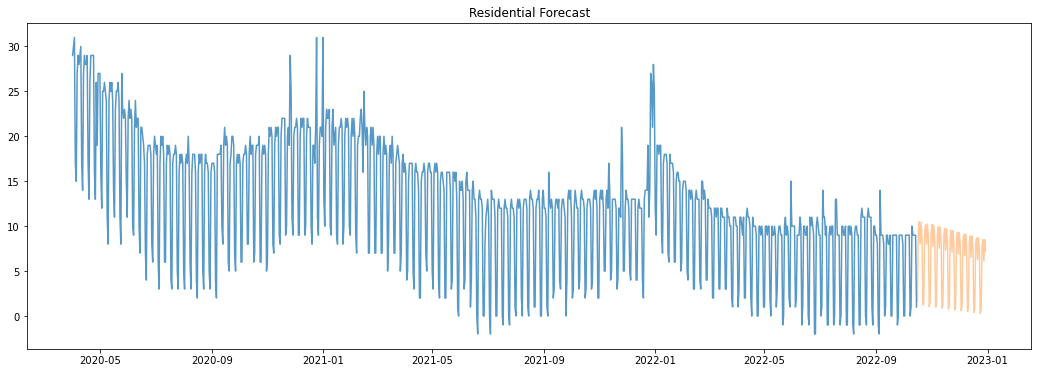

In [37]:
#Update the model
fit_model_re.update(data_test_re['residential_percent_change_from_baseline'])

# Predict data
new_preds, new_conf_int = fit_model_re.predict(n_periods=76, return_conf_int=True)
dates = pd.date_range('2022-10-16', periods=76, freq='D')
new_x_axis = pd.Series(dates)

# Plot show
plt.figure(figsize=(18,6))
plt.plot(df_re.index,df_re,alpha=0.75)
plt.plot(new_x_axis,new_preds, alpha=0.4)

plt.title("Residential Forecast")
plt.show()


7-2 Workplaces time series and forecast the rest of 2022.

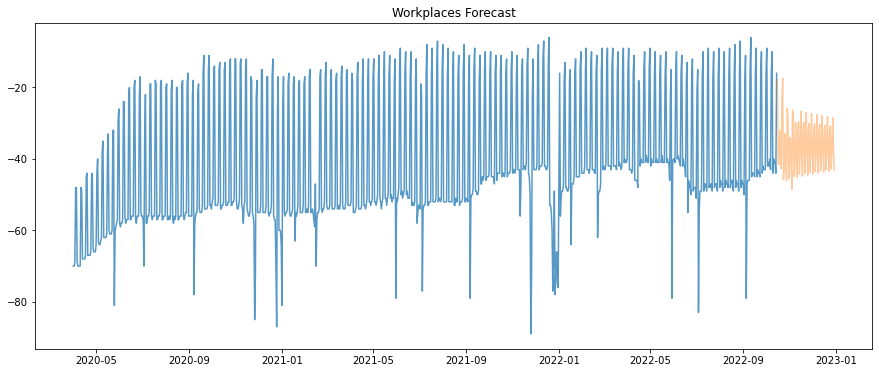

In [38]:
#Update the model
fit_model_wo.update(data_test_wo['workplaces_percent_change_from_baseline'])

# Predict data
new_preds, new_conf_int = fit_model_wo.predict(n_periods=76, return_conf_int=True)
dates = pd.date_range('2022-10-16', periods=76, freq='D')
new_x_axis = pd.Series(dates)

# Plot show
plt.figure(figsize=(15,6))
plt.plot(df_wo.index, df_wo, alpha=0.75)
plt.plot(new_x_axis, new_preds, alpha=0.4)

plt.title("Workplaces Forecast")
plt.show()

7-3 Grocery and pharmacy time series and forecast the rest of 2022.

/Users/samchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


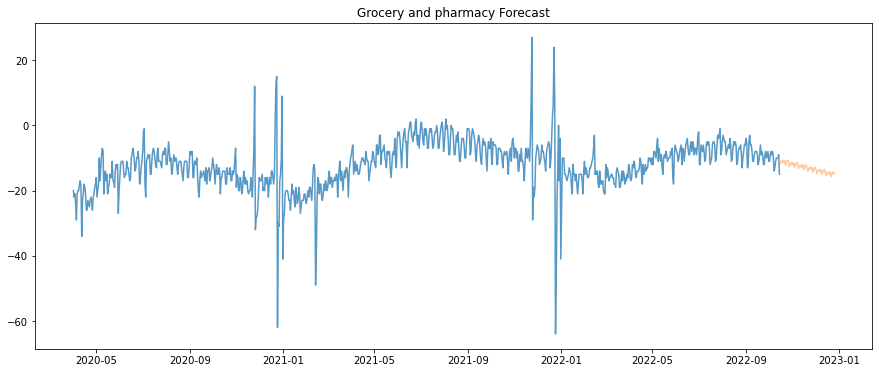

In [61]:
#Update the model
update_seasonal_es_gp = ExponentialSmoothing(df_gp['grocery_and_pharmacy_percent_change_from_baseline'],trend='add',seasonal='add',seasonal_periods=12)

# Predict data
seasonal_forecast = update_seasonal_es_gp.fit().forecast(72)

# Plot show
plt.figure(figsize=(15,6))
plt.plot(df_gp.index, df_gp, alpha=0.75)
plt.plot(seasonal_forecast,alpha=0.4)

plt.title("Grocery and pharmacy Forecast")
plt.show()